# Imports

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Data reading

In [2]:
df = pd.read_csv('data/MNIST/train.csv')

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


# Data Processing

In [5]:
df = df.astype(float)

In [6]:
X = df.drop('label',axis=1)
y = df['label']

# for Random Forest, no need to normalize! 

In [7]:
y = y.astype('int8')

In [8]:
df.isnull().sum().sum()

0

# Models

## Model 1 - Default Random Forest

In [9]:
m1 = RandomForestClassifier(n_jobs=-1)
score = cross_val_score(m1, X, y, cv=5, scoring='accuracy')
[score.mean(), score.std()]

[0.9381193801684699, 0.0017739321570000915]

## Model 2 - Random Forest with min_samples_leaf

Min samples leaf: 1
Min samples leaf: 2
Min samples leaf: 3
Min samples leaf: 4
Min samples leaf: 5
Min samples leaf: 6
Min samples leaf: 7
Min samples leaf: 8
Min samples leaf: 9


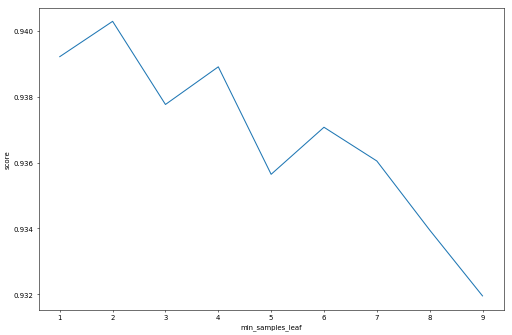

CPU times: user 2min 11s, sys: 6.13 s, total: 2min 17s
Wall time: 54.8 s


In [10]:
%%time
leaf_scores = list()
leaf_num_list = range(1,10)

for leaf_num in leaf_num_list :
    print(f'Min samples leaf: {leaf_num}')
    m = RandomForestClassifier(min_samples_leaf=leaf_num, n_jobs=-1)
    score = cross_val_score(m, X, y, cv=5, scoring='accuracy')
    leaf_scores.append(score.mean())

fig = plt.figure(figsize=(12, 8), dpi=50)
plt.plot(leaf_num_list, leaf_scores)
plt.ylabel('score')
plt.xlabel('min_samples_leaf')
plt.show()

In [11]:
best_leaf_score = max(leaf_scores)
best_leaf_num = leaf_num_list[leaf_scores.index(best_leaf_score)]
print(f"Best leaf score: {best_leaf_score} with {best_leaf_num} leaf(s)")

Best leaf score: 0.9402859166953036 with 2 leaf(s)


In [12]:
m2 = RandomForestClassifier(min_samples_leaf=best_leaf_num, n_jobs=-1)
%time score = cross_val_score(m2, X, y, cv=5, scoring='accuracy')
[score.mean(), score.std()]

CPU times: user 14.1 s, sys: 666 ms, total: 14.7 s
Wall time: 5.96 s


[0.9399771012024395, 0.0031667689718442725]

## Model 3 - Random Forest with n_estimators (num of trees)

Tree numbers: 10
Tree numbers: 50
Tree numbers: 100
Tree numbers: 250
Tree numbers: 500


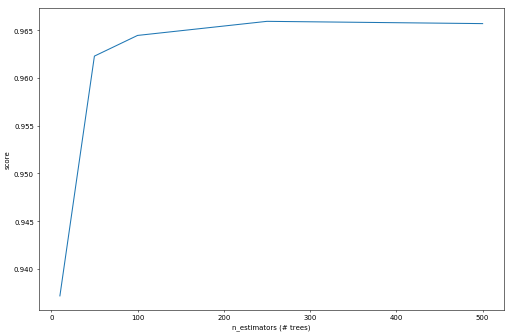

Wall time: 4min 40s


In [13]:
%%time
tree_scores = list()
tree_num_list = [10, 50, 100, 250, 500]

for tree_num in tree_num_list :
    print(f'Tree numbers: {tree_num}')
    m = RandomForestClassifier(n_estimators=tree_num, n_jobs=-1)
    score = cross_val_score(m, X, y, cv=5, scoring='accuracy')
    tree_scores.append(score.mean())

fig = plt.figure(figsize=(12, 8), dpi=50)
plt.plot(tree_num_list, tree_scores)
plt.ylabel('score')
plt.xlabel('n_estimators (# trees)')
plt.show()

In [14]:
best_tree_score = max(tree_scores)
best_tree_num = tree_num_list[tree_scores.index(best_tree_score)]
print(f"Best tree score: {best_tree_score} with {best_tree_num} tree(s)")

Best tree score: 0.9659287753861132 with 250 tree(s)


In [15]:
m3 = RandomForestClassifier(n_estimators=best_tree_num, n_jobs=-1)
%time score = cross_val_score(m3, X, y, cv=5, scoring='accuracy')
[score.mean(), score.std()]

Wall time: 1min 8s


[0.9655479052347651, 0.002143400406644074]

## Model 4 - Random Forest with max_features

In [16]:
%%time
max_features_scores = list()
max_features_list = ['auto','sqrt', 'log2', 0.5]

for max_feature in max_features_list : 
    m = RandomForestClassifier(max_features=max_feature, n_jobs=-1)
    score = cross_val_score(m, X, y, cv=5, scoring='accuracy')
    print(f'Max_feature: {max_feature}, score = {score.mean()}')

Max_feature: auto, score = 0.9370950373976632
Max_feature: sqrt, score = 0.9387856785433095
Max_feature: log2, score = 0.9258337826630904
Max_feature: 0.5, score = 0.9405955739714038
Wall time: 1min 2s


In [17]:
m4 = RandomForestClassifier(max_features=0.5, n_jobs=-1)
%time score = cross_val_score(m4, X, y, cv=5, scoring='accuracy')
[score.mean(), score.std()]

Wall time: 52.7 s


[0.9409051910076467, 0.0022096697854145186]

## Model 5 - Random Forest - combining Model 2, 3 and 4

In [18]:
m5a = RandomForestClassifier(n_estimators=250, min_samples_leaf=2, max_features=0.5, n_jobs=-1)
%time score = cross_val_score(m5a, X, y, cv=5, scoring='accuracy')
[score.mean(), score.std()]

Wall time: 16min 51s


[0.957833612338694, 0.002332201161104375]

# Summary

- Model 1 - Default Random Forest
    - [0.9381193801684699, 0.0017739321570000915]
- Model 2 - Random Forest with min_samples_leaf (2)
    - [0.9399771012024395, 0.0031667689718442725]
- Model 3 - Random Forest with n_estimators (num of trees) (250)
    - [**0.9655479052347651**, 0.002143400406644074]
- Model 4 - Random Forest with max_features (0.5)     
    - [0.9409051910076467, 0.0022096697854145186]
- Model 5 - Combo 2, 3, 4
    - [0.957833612338694, 0.002332201161104375] (250 trees)

# Investigating min_sample_leaf when n_estimators is increased

In [ ]:
# Base model
m1 = RandomForestClassifier(n_jobs=-1)
score = cross_val_score(m1, X, y, cv=5, scoring='accuracy')
[score.mean(), score.std()]

In [ ]:
m5a = RandomForestClassifier(n_estimators=250, min_samples_leaf=1, n_jobs=-1)
%time score = cross_val_score(m5a, X, y, cv=5, scoring='accuracy')
[score.mean(), score.std()]

In [ ]:
m5b = RandomForestClassifier(n_estimators=250, min_samples_leaf=2, n_jobs=-1)
%time score = cross_val_score(m5b, X, y, cv=5, scoring='accuracy')
[score.mean(), score.std()]

In [ ]:
m5c = RandomForestClassifier(n_estimators=250, min_samples_leaf=3, n_jobs=-1)
%time score = cross_val_score(m5c, X, y, cv=5, scoring='accuracy')
[score.mean(), score.std()]

Increasing the min_sample_leaf decreases accuracy!

# Investigating max_features when n_estimators is increased

In [ ]:
m4 = RandomForestClassifier(n_estimators=250, max_features=0.5, n_jobs=-1)
%time score = cross_val_score(m4, X, y, cv=5, scoring='accuracy')
[score.mean(), score.std()]

Changing the max_features does not improve accuracy much!